In [4]:
# Stock Market Dataset Preprocessing
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")


Libraries imported successfully!


In [5]:
# Load the dataset
df = pd.read_csv('financial_data.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date to ensure proper time-series order
df = df.sort_values('date').reset_index(drop=True)

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head(10))
print(f"\nDataset info:")
print(df.info())
print(f"\nMissing values:")
print(df.isnull().sum())


Dataset loaded successfully!

Dataset shape: (30, 3)

First few rows:
        date  closing_price  volume
0 2025-01-01            NaN  5000.0
1 2025-01-02         131.04  2000.0
2 2025-01-03         138.26  2000.0
3 2025-01-04         164.68     NaN
4 2025-01-05         165.06  5000.0
5 2025-01-06         137.99  1500.0
6 2025-01-07         151.00  5000.0
7 2025-01-08            NaN  1500.0
8 2025-01-09         190.09  1500.0
9 2025-01-10         135.16  1000.0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30 non-null     datetime64[ns]
 1   closing_price  25 non-null     float64       
 2   volume         26 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 852.0 bytes
None

Missing values:
date             0
closing_price    5
volume           4
dtype: int64


In [6]:
# Step 1: Handle missing values in closing_price and volume

# For closing_price: Use forward fill (carry forward last known value) 
# followed by backward fill (for any remaining missing values at the start)
df['closing_price'] = df['closing_price'].ffill().bfill()

# For volume: Use forward fill followed by backward fill
# If still missing, fill with median volume
df['volume'] = df['volume'].ffill().bfill()
if df['volume'].isnull().sum() > 0:
    df['volume'] = df['volume'].fillna(df['volume'].median())

print("Missing values handled!")
print(f"\nRemaining missing values:")
print(df.isnull().sum())
print(f"\nDataset after handling missing values:")
print(df.head(15))


Missing values handled!

Remaining missing values:
date             0
closing_price    0
volume           0
dtype: int64

Dataset after handling missing values:
         date  closing_price  volume
0  2025-01-01         131.04  5000.0
1  2025-01-02         131.04  2000.0
2  2025-01-03         138.26  2000.0
3  2025-01-04         164.68  2000.0
4  2025-01-05         165.06  5000.0
5  2025-01-06         137.99  1500.0
6  2025-01-07         151.00  5000.0
7  2025-01-08         151.00  1500.0
8  2025-01-09         190.09  1500.0
9  2025-01-10         135.16  1000.0
10 2025-01-11         146.99  5000.0
11 2025-01-12         120.55  2000.0
12 2025-01-13         168.97  2000.0
13 2025-01-14         149.75  1500.0
14 2025-01-15         149.75  1000.0


In [7]:
# Step 2: Create lag features - 1-day return and 7-day return

# Calculate returns: (current_price - previous_price) / previous_price * 100
# 1-day return
df['return_1d'] = df['closing_price'].pct_change(periods=1) * 100

# 7-day return
df['return_7d'] = df['closing_price'].pct_change(periods=7) * 100

print("Lag features created!")
print(f"\nDataset with lag features:")
print(df[['date', 'closing_price', 'return_1d', 'return_7d']].head(15))


Lag features created!

Dataset with lag features:
         date  closing_price  return_1d  return_7d
0  2025-01-01         131.04        NaN        NaN
1  2025-01-02         131.04   0.000000        NaN
2  2025-01-03         138.26   5.509768        NaN
3  2025-01-04         164.68  19.108925        NaN
4  2025-01-05         165.06   0.230751        NaN
5  2025-01-06         137.99 -16.400097        NaN
6  2025-01-07         151.00   9.428219        NaN
7  2025-01-08         151.00   0.000000  15.231990
8  2025-01-09         190.09  25.887417  45.062576
9  2025-01-10         135.16 -28.896838  -2.242152
10 2025-01-11         146.99   8.752590 -10.742045
11 2025-01-12         120.55 -17.987618 -26.965952
12 2025-01-13         168.97  40.165906  22.450902
13 2025-01-14         149.75 -11.374800  -0.827815
14 2025-01-15         149.75   0.000000  -0.827815


In [8]:
# Step 3: Normalize the volume column using log-scaling
# Add a small constant (1) to avoid log(0) issues
df['volume_log'] = np.log1p(df['volume'])  # log1p = log(1 + x), handles zeros better

print("Volume normalized using log-scaling!")
print(f"\nOriginal volume vs Log-scaled volume:")
print(df[['date', 'volume', 'volume_log']].head(15))
print(f"\nVolume statistics:")
print(f"Original volume - Min: {df['volume'].min():.2f}, Max: {df['volume'].max():.2f}, Mean: {df['volume'].mean():.2f}")
print(f"Log volume - Min: {df['volume_log'].min():.2f}, Max: {df['volume_log'].max():.2f}, Mean: {df['volume_log'].mean():.2f}")


Volume normalized using log-scaling!

Original volume vs Log-scaled volume:
         date  volume  volume_log
0  2025-01-01  5000.0    8.517393
1  2025-01-02  2000.0    7.601402
2  2025-01-03  2000.0    7.601402
3  2025-01-04  2000.0    7.601402
4  2025-01-05  5000.0    8.517393
5  2025-01-06  1500.0    7.313887
6  2025-01-07  5000.0    8.517393
7  2025-01-08  1500.0    7.313887
8  2025-01-09  1500.0    7.313887
9  2025-01-10  1000.0    6.908755
10 2025-01-11  5000.0    8.517393
11 2025-01-12  2000.0    7.601402
12 2025-01-13  2000.0    7.601402
13 2025-01-14  1500.0    7.313887
14 2025-01-15  1000.0    6.908755

Volume statistics:
Original volume - Min: 1000.00, Max: 5000.00, Mean: 2416.67
Log volume - Min: 6.91, Max: 8.52, Mean: 7.63


IQR Method Statistics:
Q1 (25th percentile): 132.07
Q3 (75th percentile): 164.59
IQR: 32.53
Lower bound: 83.28
Upper bound: 213.38

Number of outliers detected: 0

No outliers detected!


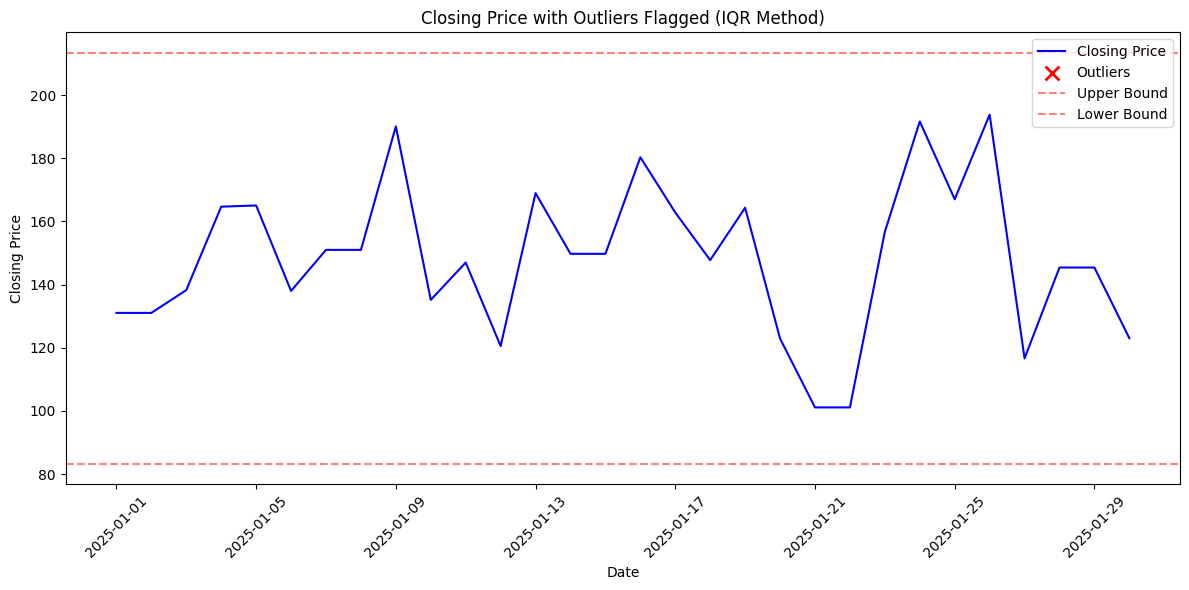

In [9]:
# Step 4: Detect and flag/remove outliers in closing_price using IQR method

# Calculate IQR (Interquartile Range)
Q1 = df['closing_price'].quantile(0.25)
Q3 = df['closing_price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR Method Statistics:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Flag outliers
df['is_outlier'] = (df['closing_price'] < lower_bound) | (df['closing_price'] > upper_bound)

# Count outliers
outlier_count = df['is_outlier'].sum()
print(f"\nNumber of outliers detected: {outlier_count}")

# Show outliers
if outlier_count > 0:
    print(f"\nOutlier rows:")
    print(df[df['is_outlier']][['date', 'closing_price', 'volume']])
else:
    print("\nNo outliers detected!")

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing_price'], 'b-', label='Closing Price', linewidth=1.5)
plt.scatter(df[df['is_outlier']]['date'], df[df['is_outlier']]['closing_price'], 
            color='red', marker='x', s=100, label='Outliers', linewidths=2)
plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.5, label='Upper Bound')
plt.axhline(y=lower_bound, color='r', linestyle='--', alpha=0.5, label='Lower Bound')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Outliers Flagged (IQR Method)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Remove outliers from the dataset
df_cleaned = df[~df['is_outlier']].copy()

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape (after removing outliers): {df_cleaned.shape}")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]}")

# Drop the is_outlier flag column as it's no longer needed
df_cleaned = df_cleaned.drop('is_outlier', axis=1)

print(f"\nFinal cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (30, 7)
Cleaned dataset shape (after removing outliers): (30, 7)
Rows removed: 0

Final cleaned dataset shape: (30, 6)


In [11]:
# Step 5: Produce final cleaned, feature-enhanced time-series dataset

# Select and reorder columns for the final dataset
final_dataset = df_cleaned[['date', 'closing_price', 'volume', 'volume_log', 'return_1d', 'return_7d']].copy()

# Reset index
final_dataset = final_dataset.reset_index(drop=True)

print("="*80)
print("FINAL CLEANED, FEATURE-ENHANCED TIME-SERIES DATASET")
print("="*80)
print(f"\nDataset shape: {final_dataset.shape}")
print(f"\nColumn names: {list(final_dataset.columns)}")
print(f"\nDataset info:")
print(final_dataset.info())
print(f"\nFirst 15 rows:")
print(final_dataset.head(15))
print(f"\nLast 10 rows:")
print(final_dataset.tail(10))
print(f"\nDataset statistics:")
print(final_dataset.describe())
print(f"\nMissing values check:")
print(final_dataset.isnull().sum())


FINAL CLEANED, FEATURE-ENHANCED TIME-SERIES DATASET

Dataset shape: (30, 6)

Column names: ['date', 'closing_price', 'volume', 'volume_log', 'return_1d', 'return_7d']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30 non-null     datetime64[ns]
 1   closing_price  30 non-null     float64       
 2   volume         30 non-null     float64       
 3   volume_log     30 non-null     float64       
 4   return_1d      29 non-null     float64       
 5   return_7d      23 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.5 KB
None

First 15 rows:
         date  closing_price  volume  volume_log  return_1d  return_7d
0  2025-01-01         131.04  5000.0    8.517393        NaN        NaN
1  2025-01-02         131.04  2000.0    7.601402   0.000000        NaN
2  2025-01-03  

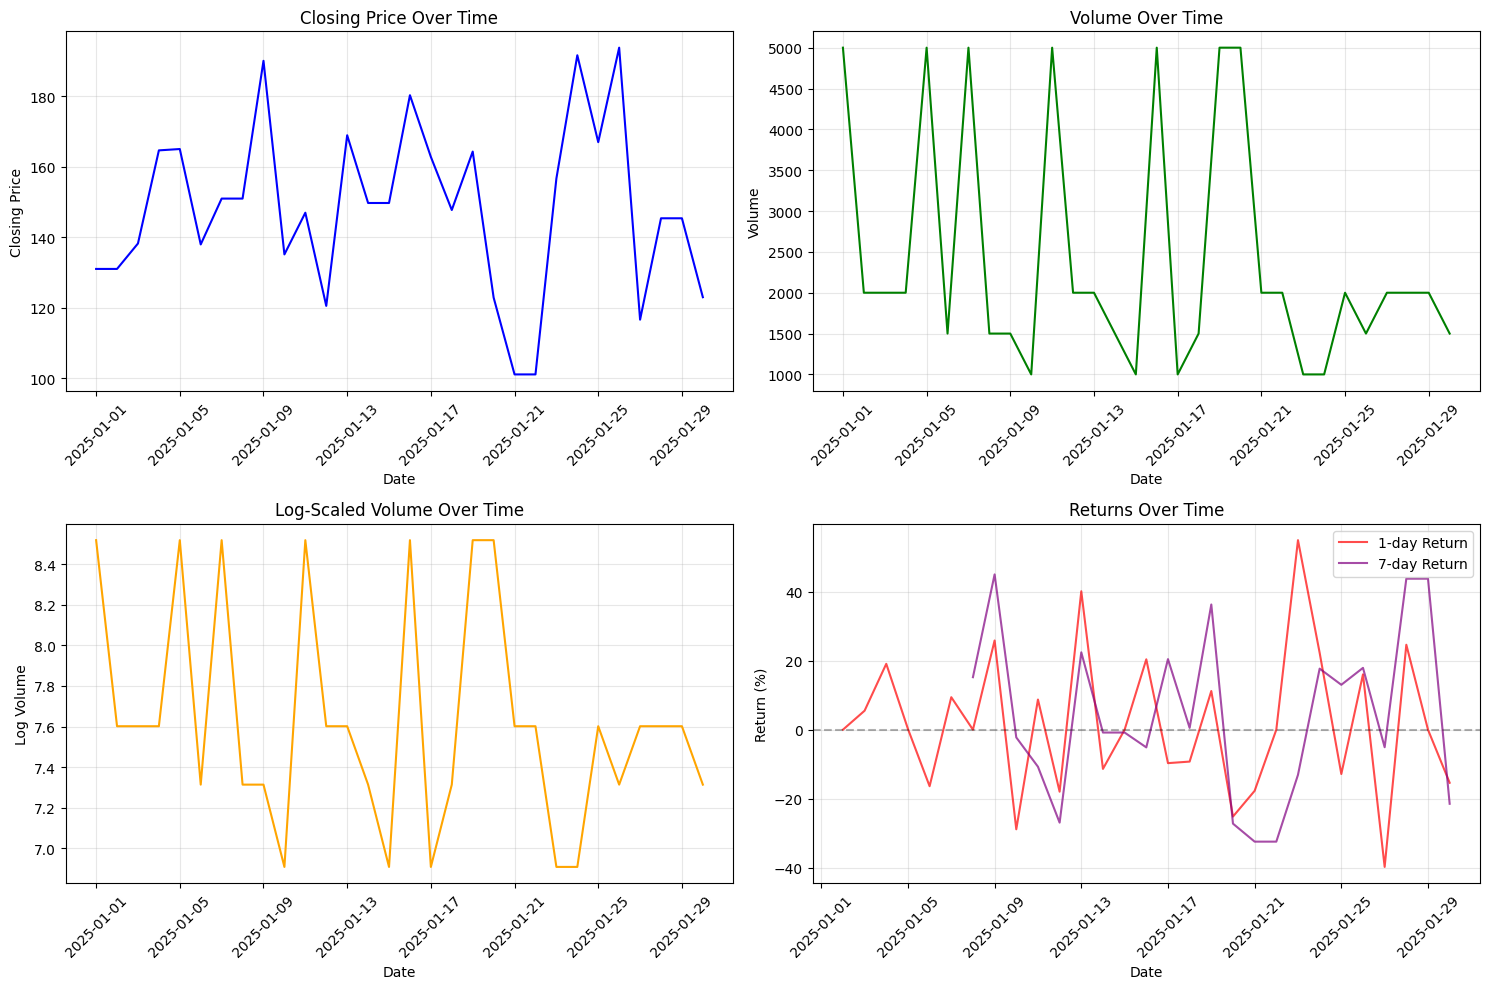

In [12]:
# Visualize the cleaned dataset
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Closing Price over time
axes[0, 0].plot(final_dataset['date'], final_dataset['closing_price'], 'b-', linewidth=1.5)
axes[0, 0].set_title('Closing Price Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Closing Price')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Volume (original) over time
axes[0, 1].plot(final_dataset['date'], final_dataset['volume'], 'g-', linewidth=1.5)
axes[0, 1].set_title('Volume Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Log-scaled Volume over time
axes[1, 0].plot(final_dataset['date'], final_dataset['volume_log'], 'orange', linewidth=1.5)
axes[1, 0].set_title('Log-Scaled Volume Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Log Volume')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Returns over time
axes[1, 1].plot(final_dataset['date'], final_dataset['return_1d'], 'r-', label='1-day Return', linewidth=1.5, alpha=0.7)
axes[1, 1].plot(final_dataset['date'], final_dataset['return_7d'], 'purple', label='7-day Return', linewidth=1.5, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1, 1].set_title('Returns Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Return (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
# Save the cleaned dataset to CSV
output_filename = 'financial_data_cleaned.csv'
final_dataset.to_csv(output_filename, index=False)
print(f"Cleaned dataset saved to '{output_filename}'")
print(f"\nDataset is ready for forecasting models!")
print(f"\nFeatures available:")
print("  - date: Time index")
print("  - closing_price: Target variable for forecasting")
print("  - volume: Original volume")
print("  - volume_log: Log-normalized volume")
print("  - return_1d: 1-day return (lag feature)")
print("  - return_7d: 7-day return (lag feature)")


Cleaned dataset saved to 'financial_data_cleaned.csv'

Dataset is ready for forecasting models!

Features available:
  - date: Time index
  - closing_price: Target variable for forecasting
  - volume: Original volume
  - volume_log: Log-normalized volume
  - return_1d: 1-day return (lag feature)
  - return_7d: 7-day return (lag feature)
